In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [ ]:
btc_data=pd.read_csv("D:/Analyse-comparative-des-actifs-financiers/bitcoin_historical_data_cleaned.csv")
sp500_data=pd.read_csv("D:/Analyse-comparative-des-actifs-financiers/sp500_historical_data_cleaned.csv")
gold_data=pd.read_csv("D:/Analyse-comparative-des-actifs-financiers/gold_historical_data_cleaned.csv")

In [5]:
#Statistique descriptive 
btc_data.describe()


,Close,High,Low,Open,Volume
count,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,32720.074108,33397.097056,31939.574220,32680.525314,3.085689e+10
std,23705.349337,24194.384984,23145.630811,23677.004904,1.946871e+10
min,3399.470000,3427.950000,3391.020000,3401.380000,4.324201e+09
25%,10689.750000,10896.460000,10447.137500,10677.445000,1.803917e+10
50%,27794.805000,28305.765000,27245.495000,27781.830000,2.703812e+10
75%,47286.945000,48476.105000,46444.472500,47291.032500,3.818185e+10
max,106146.270000,109114.880000,105291.730000,106147.300000,3.509679e+11


In [33]:
sp500_data.describe()

,Close,High,Low,Open,Volume
count,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03
mean,4066.804645,4088.892397,4041.517055,4065.902456,4.246306e+09
std,892.126701,893.743214,890.620427,892.322155,1.021286e+09
min,2237.400000,2300.730000,2191.860000,2290.710000,1.296530e+09
25%,3288.710000,3305.885000,3269.920000,3286.915000,3.635455e+09
50%,4101.230000,4129.480000,4072.560000,4095.410000,4.007510e+09
75%,4536.645000,4558.390000,4516.745000,4540.705000,4.584180e+09
max,6118.710000,6128.180000,6088.740000,6121.430000,9.976520e+09


In [34]:
gold_data.describe()

,Close,High,Low,Open,Volume
count,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,32720.074108,33397.097056,31939.574220,32680.525314,3.085689e+10
std,23705.349337,24194.384984,23145.630811,23677.004904,1.946871e+10
min,3399.470000,3427.950000,3391.020000,3401.380000,4.324201e+09
25%,10689.750000,10896.460000,10447.137500,10677.445000,1.803917e+10
50%,27794.805000,28305.765000,27245.495000,27781.830000,2.703812e+10
75%,47286.945000,48476.105000,46444.472500,47291.032500,3.818185e+10
max,106146.270000,109114.880000,105291.730000,106147.300000,3.509679e+11


In [35]:
#Verification valeurs manquantes 
btc_data.isnull().sum()


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [36]:
sp500_data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [37]:
gold_data.isnull().sum()




Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [38]:
for col in btc_data.columns:
    if col !="Date":
        btc_data[col]=pd.to_numeric(btc_data[col],errors="coerce")
        
btc_data.dtypes        

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [39]:
for col in btc_data.columns:
    if col !="Date":
        sp500_data[col]=pd.to_numeric(sp500_data[col],errors="coerce")
        
sp500_data.dtypes  

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [40]:
for col in btc_data.columns:
    if col !="Date":
        gold_data[col]=pd.to_numeric(gold_data[col],errors="coerce")
        
gold_data.dtypes  

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

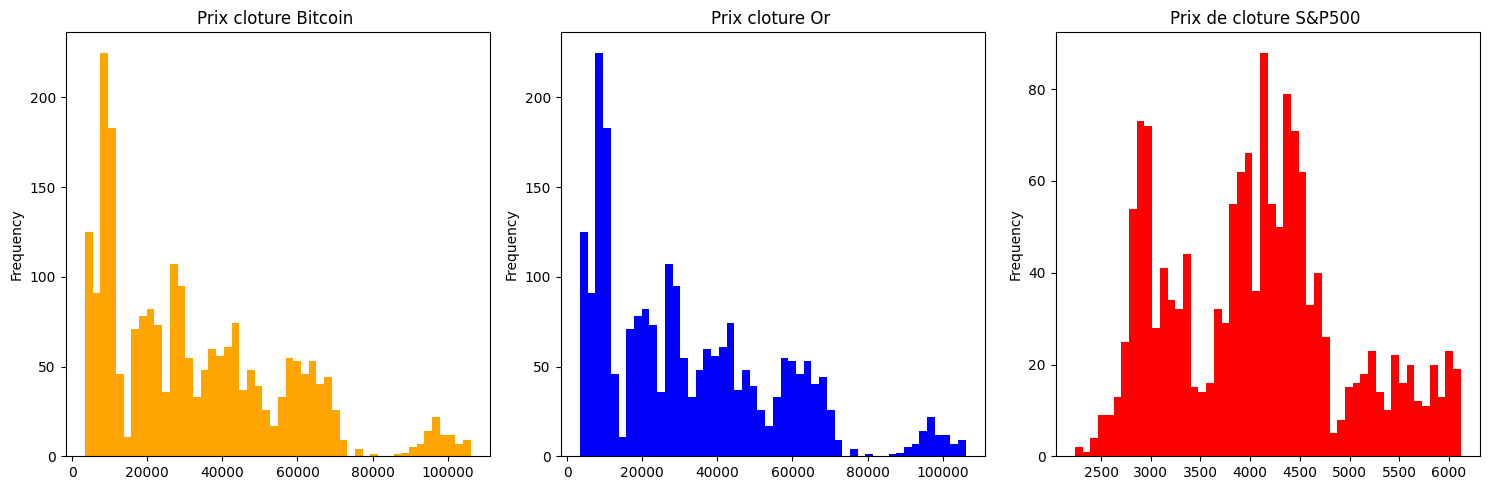

In [41]:
#Visualisation des distribution des prix de cloture 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
btc_data['Close'].plot(kind='hist' , bins=50 , color='orange',title='Prix cloture Bitcoin ')
plt.subplot(1,3,2)
gold_data['Close'].plot(kind='hist' , bins=50 , color='blue',title='Prix cloture Or ')
plt.subplot(1,3,3)
sp500_data['Close'].plot(kind='hist' , bins=50 , color='red',title='Prix de cloture S&P500 ')
plt.tight_layout()
plt.show()

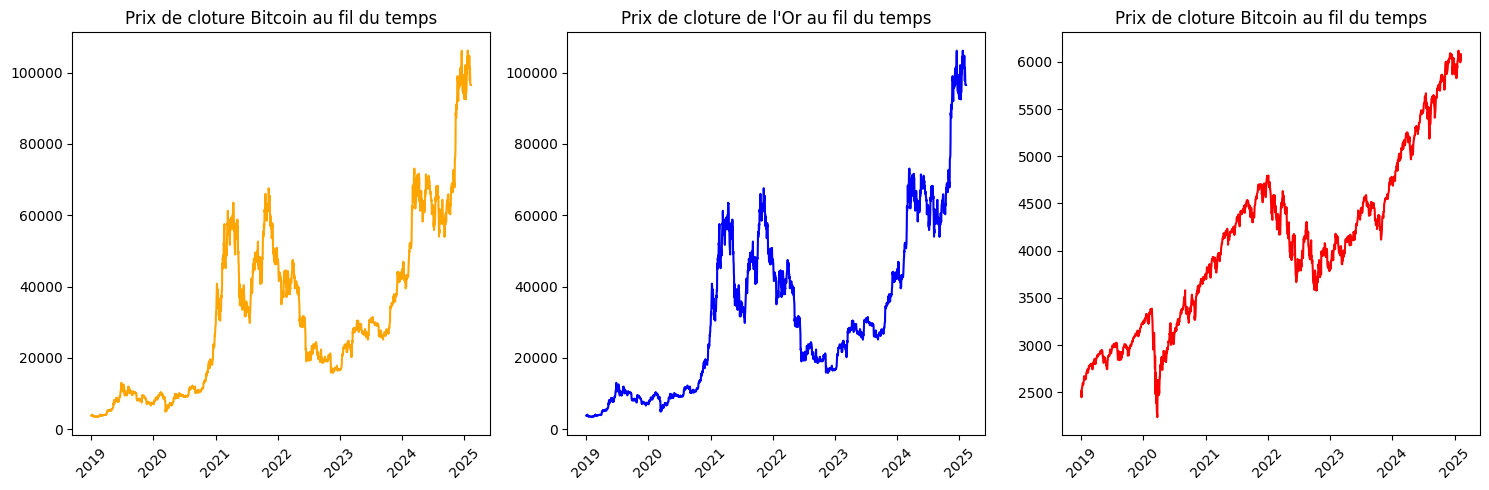

In [45]:
#Verification de l'evolution des prix de cloture au fil du temps


# Vérifier et convertir la colonne 'Date' en datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Trier les données par date
btc_data = btc_data.sort_values('Date')
gold_data = gold_data.sort_values('Date')
sp500_data = sp500_data.sort_values('Date')


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(btc_data['Date'], btc_data['Close'], color='orange')
plt.title('Prix de cloture Bitcoin au fil du temps')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.plot(gold_data['Date'], gold_data['Close'], color='blue')
plt.title("Prix de cloture de l'Or au fil du temps")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.plot(sp500_data['Date'], sp500_data['Close'], color='red')
plt.title('Prix de cloture Bitcoin au fil du temps')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [47]:
btc_data.corr()
gold_data.corr()
sp500_data.corr()

,Date,Close,High,Low,Open,Volume
Date,1.000000,0.904753,0.906627,0.902973,0.904684,-0.059337
Close,0.904753,1.000000,0.999570,0.999645,0.999212,-0.119162
High,0.906627,0.999570,1.000000,0.999442,0.999709,-0.109107
Low,0.902973,0.999645,0.999442,1.000000,0.999564,-0.127304
Open,0.904684,0.999212,0.999709,0.999564,1.000000,-0.115896
Volume,-0.059337,-0.119162,-0.109107,-0.127304,-0.115896,1.000000
